## Yatsa Data Analytics

Yatsa is a company that provides asset tracking and management solutions to individuals. The purpose of this notebook is to provide a brief overview of the data collected by Yatsa from its users' assets and their trips.
The primary objective of the analytics conducted on this data is to device valuable insights and address key business questions, such as:
1.  What is the average distance travelled by vehicles in a day, week or month? Or weekdays vs weekends?
2.  What are the most common destination for vehicles and how frequent do they travel to  these destinations?

### Extra
3.  Any trends in driver behaviour for example speeding?
4.  Any pattern or trends in the types of trips made by vehicles for example: do smaller vehicles travel     through smaller distances.

## Loading the data and preprocessing it for analysis and visualization 

Loaded the data from the json files into a pandas dataframe. The Data is stored in the data folder in the root directory of the project.

In [3]:
import pandas as pd
assets = pd.read_json('Data/assets.json')

In [4]:
# Check the first five rows of the assets dataframe
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006.0
1,DpXMzg3,Lexus CT 200h,CT 200h,NaN
2,4tQe9sV,Honda Odyssey,Odyssey,NaN
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005.0
4,eH0O4bf,Nissan,Note,2011.0


In [5]:
# Check for unique assets make 
assets['make'].unique()

array(['TOYOTA Ractis 1.0', 'Lexus CT 200h', 'Honda Odyssey',
       'MITSUBISHI Lancer Cedia LA-CS2A', 'Nissan', 'MAZDA Demio',
       'TOYOTA HIACE', 'SUZUKI EVERY', 'TOYOTA', 'Mitsubishi', 'BAJAJ',
       'PIAGGIO', 'NISSAN MARCH/micra/MT',
       'TOYOTA HILUX  TGN26R - Manual', 'TOYOTA COROLLA', 'tuk tuk',
       'BMW F650 GS 218', 'HAOJIN', 'CAR', 'Tuk Tuk', 'PEUGEOT 207',
       'TOYOTA PROBOX', 'TUK TUK', 'HONDA',
       'NISSAN X-TRAIL Mpfi CVT(NEW) NT32', 'LEXUS NX 300H CVT', 'NOAH',
       'MARUTI', 'Car'], dtype=object)

In [6]:
# loading the trips json file using json.load() method and storing it in a variable called trips
import json
with open('Data/trips.json') as f:
    trips = json.load(f)

In [7]:
"""
json_normalize() method flattens a JSON object into a pandas DataFrame.
It converts the nested JSON object into a tabular format by creating columns for all scalar values
and columns for all keys in nested object
"""
trips_made_df = pd.json_normalize(trips, sep='_')
print(trips_made_df)

           id                        created asset_id  distance  \
0     35Ldjpf  2022-03-14T17:31:51.003+00:00  0ROajub   4321.65   
1     agWTdy5  2023-03-07T08:53:55.607+00:00  0gMAW5w  24703.24   
2     mcXsPmo  2023-03-07T06:40:53.771+00:00  0gMAW5w  30689.27   
3     WRBY3Lt  2023-03-07T05:12:29.007+00:00  0gMAW5w  24609.34   
4     1WaNBeb   2023-03-07T03:15:18.67+00:00  0gMAW5w  28395.71   
...       ...                            ...      ...       ...   
4799  GeaklYd  2023-02-21T11:41:10.948+00:00  3XBsRFw  13803.78   
4800  NSzqS6B  2023-02-21T10:17:02.952+00:00  3XBsRFw   4968.03   
4801  jMW6L4T  2023-02-21T09:15:30.916+00:00  3XBsRFw  10180.62   
4802  pNnBGll  2023-02-21T08:41:38.993+00:00  3XBsRFw   3134.15   
4803  0m7p0zj  2023-02-21T08:18:09.792+00:00  3XBsRFw    644.23   

                                                 points  origin_latitude  \
0     [{'bearing': 0.0, 'location': {'latitude': -1....        -1.043220   
1     [{'bearing': 0.0, 'location': {'latit

## Explorative Data Analysis

In [8]:
trips_made_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758
std,20407.447419,0.433675,0.411567,0.435225,0.411621
min,101.510000,-3.229457,34.215324,-3.328162,34.217648
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073
max,342478.600000,1.256370,40.124302,1.256327,40.126652


In [9]:
trips_made_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4804 non-null   object 
 1   created                 4804 non-null   object 
 2   asset_id                4804 non-null   object 
 3   distance                4804 non-null   float64
 4   points                  4804 non-null   object 
 5   origin_latitude         4804 non-null   float64
 6   origin_longitude        4804 non-null   float64
 7   origin_time_stamp       4804 non-null   object 
 8   origin_address          4803 non-null   object 
 9   origin_odometer         0 non-null      object 
 10  destination_latitude    4804 non-null   float64
 11  destination_longitude   4804 non-null   float64
 12  destination_time_stamp  4804 non-null   object 
 13  destination_address     4803 non-null   object 
 14  destination_odometer    0 non-null      

In [10]:
trips_made_df.head()

,id,created,asset_id,distance,points,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",None
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",None
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",None


In [11]:
assets.shape

(34, 4)

In [12]:
assets.isnull().sum()

id        0
make      0
model    13
year     15
dtype: int64

In [13]:
trips_made_df.isnull().sum()

id                           0
created                      0
asset_id                     0
distance                     0
points                       0
origin_latitude              0
origin_longitude             0
origin_time_stamp            0
origin_address               1
origin_odometer           4804
destination_latitude         0
destination_longitude        0
destination_time_stamp       0
destination_address          1
destination_odometer      4804
dtype: int64

In [14]:
# drop the columns whose entire column is null
trips_made_df.dropna(axis=1, how='all', inplace=True)

In [15]:
trips_made_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758
std,20407.447419,0.433675,0.411567,0.435225,0.411621
min,101.510000,-3.229457,34.215324,-3.328162,34.217648
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073
max,342478.600000,1.256370,40.124302,1.256327,40.126652


In [16]:
trips_made_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
points                    0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            1
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       1
dtype: int64

In [17]:
# drop the trips made entry with NaN value for origin_address and destination_address
trips_made_df.dropna(subset=['origin_address', 'destination_address'], inplace=True)

In [18]:
trips_made_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
points                    0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            0
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       0
dtype: int64

In [19]:
# converted the created column entry to a datetime object to be able to convert it to day, week. month, year
trips_made_df['created'] = pd.to_datetime(trips_made_df['created'])
trips_made_df['created_day'] = trips_made_df['created'].dt.day_name()
trips_made_df['created_week'] = trips_made_df['created'].dt.week
trips_made_df['created_month'] = trips_made_df['created'].dt.month

/tmp/ipykernel_108/1616518138.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  trips_made_df['created_week'] = trips_made_df['created'].dt.week


In [20]:
# categorize the trips made based on the year
trips_made_df['created_year'] = trips_made_df['created'].dt.year

In [21]:
trips_made_df.head()

,id,created,asset_id,distance,points,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,created_day,created_week,created_month,created_year
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",Monday,11,3,2022
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",Tuesday,10,3,2023
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",Tuesday,10,3,2023
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",Tuesday,10,3,2023
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",Tuesday,10,3,2023


In [22]:
# Checking the number of trips made on different days of the week based on the trip ID
trips_made_df.groupby('created_day')['id'].count()

created_day
Friday       722
Monday       704
Saturday     801
Sunday       598
Thursday     649
Tuesday      643
Wednesday    686
Name: id, dtype: int64

In [23]:
# Checking the average daily distance covered by the assets on different days of the week
trips_made_df.groupby('created_day')['distance'].mean()

created_day
Friday       12199.504335
Monday       10685.072330
Saturday     11838.385256
Sunday       11096.259783
Thursday     11872.232419
Tuesday      10256.826641
Wednesday    10575.612157
Name: distance, dtype: float64

In [24]:
# Checking the average weekly distance covered by the assets on different weeks of the year
trips_made_df.groupby('created_week')['distance'].mean()

created_week
1     11314.148857
2      5040.174857
3     10277.398500
4     13842.073500
5      8740.816307
6      7984.538346
7      9636.384235
8      9625.121792
9     10890.477687
10    12596.259706
11     4321.650000
12     6645.122941
13     1712.585000
17     9102.640270
18    10128.154479
19    16731.929545
20    17654.280909
21     7760.119394
22    10630.829167
23    21546.111500
24    21153.024400
25    16391.706667
26    29978.595000
27    15471.029804
28     8543.555000
29     5796.229000
30     4166.194000
31    17931.975000
32     1716.628000
33     3728.954000
34     8331.772353
35     4842.061563
36     8606.825714
37     3658.766383
38     7815.842833
39    18382.953380
40     7648.293947
41    14536.382925
42    13435.137679
43     8315.178161
44    10738.630893
45     6661.445648
46     8716.652707
47    15826.582831
48    15858.567615
49    15139.448235
50    11032.953871
51    17455.789180
52     9614.624324
Name: distance, dtype: float64

In [25]:
# Checking the average monthly distance covered by the assets on different months of the year
trips_made_df.groupby('created_month')['distance'].mean()

created_month
1     10762.353975
2      9002.992650
3     11522.344992
4      7660.103898
5     12837.588539
6     21226.067136
7     16893.984600
8      6251.707179
9      9522.650697
10    11883.782965
11    11602.082706
12    13755.635497
Name: distance, dtype: float64

In [26]:
trips_made_df['created_day'] = pd.Categorical(trips_made_df['created_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
# grouped = trips_made_df.groupby('created_day')['distance'].mean().sort_index()

## Utility function to do average distance lineplots

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Draw lineplot utility function"""
def draw_lineplot(df_query, label, xlabel, ylabel, title):
    """
    args:
        df_query - sliced data from the trips_made_df dataframe
        label - plot label i.e. daily, weekly, monthly
    """
    plt.figure(figsize=(10, 5))
    plt.plot(df_query, label=label)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## 1. Average Distance Covered in a daily, weekly and monthly basis

## 1a) Average Daily Distance

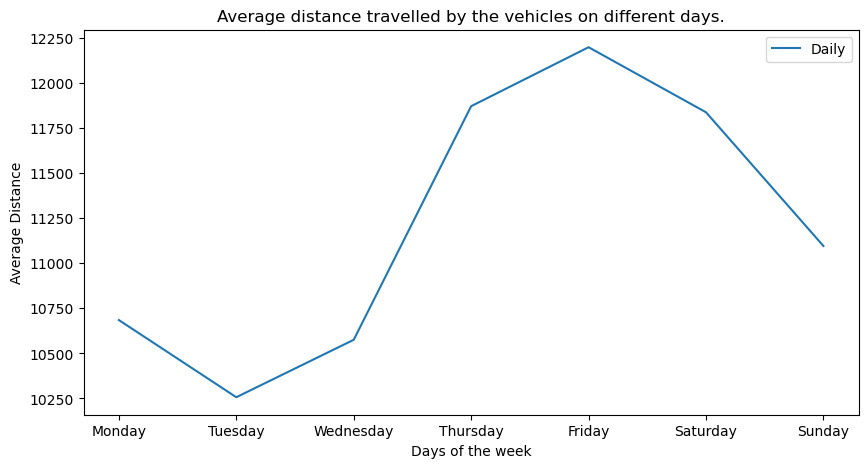

In [28]:
draw_lineplot(trips_made_df.groupby('created_day')['distance'].mean().sort_index(), 'Daily', 'Days of the week', 'Average Distance', 'Average distance travelled by the vehicles on different days.')

## 1b) Average Weekly Distance

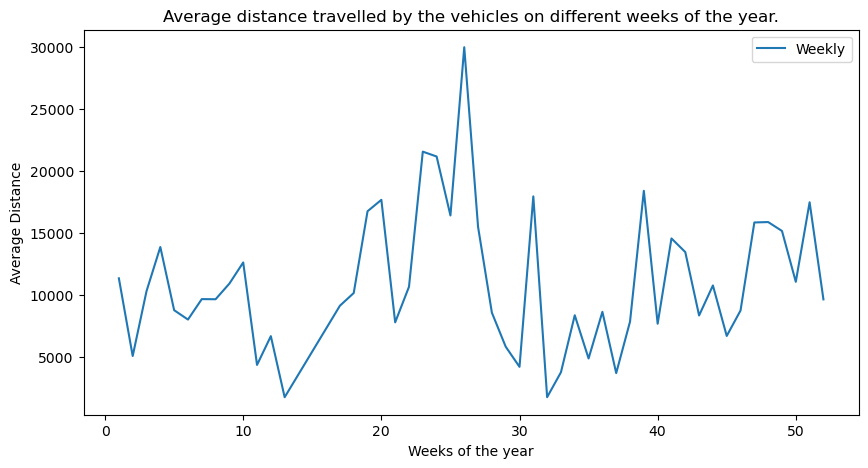

In [29]:
draw_lineplot(trips_made_df.groupby('created_week')['distance'].mean().sort_index(), 'Weekly', 'Weeks of the year', 'Average Distance', 'Average distance travelled by the vehicles on different weeks of the year.')

## 1c) Average Monthly Distance

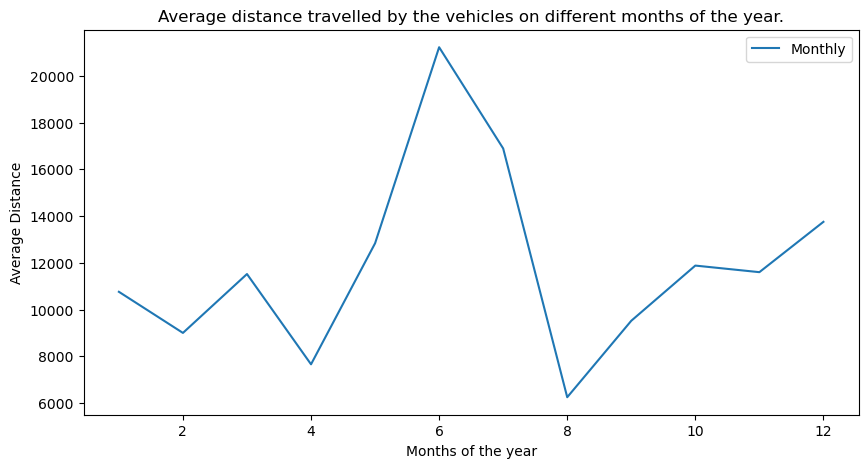

In [30]:
draw_lineplot(trips_made_df.groupby('created_month')['distance'].mean().sort_index(), 'Monthly', 'Months of the year', 'Average Distance', 'Average distance travelled by the vehicles on different months of the year.')

## 1d) Average Distance Covered in the weekdays vs weekends

In [31]:
# compare the average distance covered in the weekdays vs weekends
trips_made_df['created_dayofweek'] = trips_made_df['created'].dt.dayofweek
trips_made_df['created_dayofweek'] = trips_made_df['created_dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [32]:
trips_made_df.head()

,id,created,asset_id,distance,points,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,created_day,created_week,created_month,created_year,created_dayofweek
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",Monday,11,3,2022,Weekday
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",Tuesday,10,3,2023,Weekday
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",Tuesday,10,3,2023,Weekday
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",Tuesday,10,3,2023,Weekday
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",Tuesday,10,3,2023,Weekday


In [33]:
# checking the average distance covered during the weekends and weekdays
trips_made_df.groupby('created_dayofweek')['distance'].mean()

created_dayofweek
Weekday    11129.677250
Weekend    11521.165075
Name: distance, dtype: float64

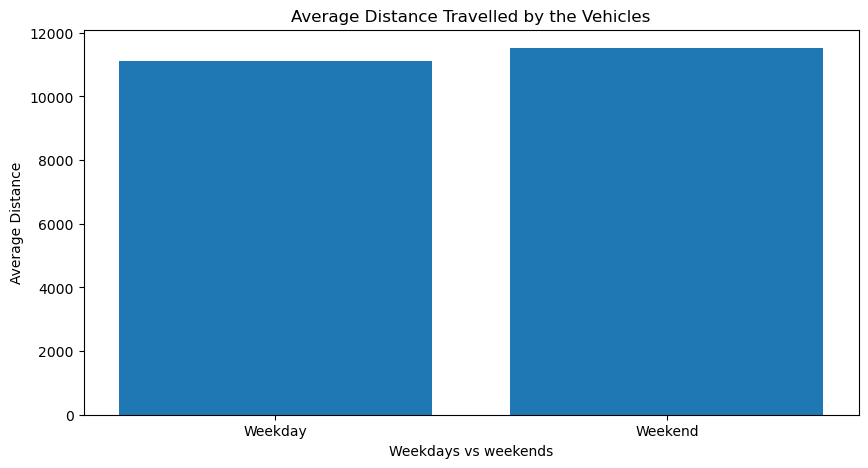

In [34]:
# Use visualization to compare the average distance covered in the weekdays vs weekends
plt.figure(figsize=(10, 5))
plt.bar(trips_made_df.groupby('created_dayofweek')['distance'].mean().index, trips_made_df.groupby('created_dayofweek')['distance'].mean())
plt.xlabel('Weekdays vs weekends')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

## 2. Most frequent destinations and the number of trips made to the destinations

In [35]:
# find the most frequent visited destination
trips_made_df['destination_address'].value_counts().head(10)

Thika, Kiambu County, Kenya                                             466
Ruiru, Kiambu County, Kenya                                             181
Kiandutu Slums, Thika, Kiambu County, Kenya                             175
A3, Thika, Kiambu County, Kenya                                         158
Super Highway, Ruiru, Kenya                                             123
Kianyaga, Kirinyaga County, Kenya                                       116
Eastern By Pass, Ruiru, Kiambu County, Kenya                            109
Makongeni, Thika, Kiambu County, Kenya                                  106
Kiganjo - British American Tobacco Road, Thika, Kiambu County, Kenya     88
Mitero Road, Ndathi, Nyeri County, Kenya                                 78
Name: destination_address, dtype: int64

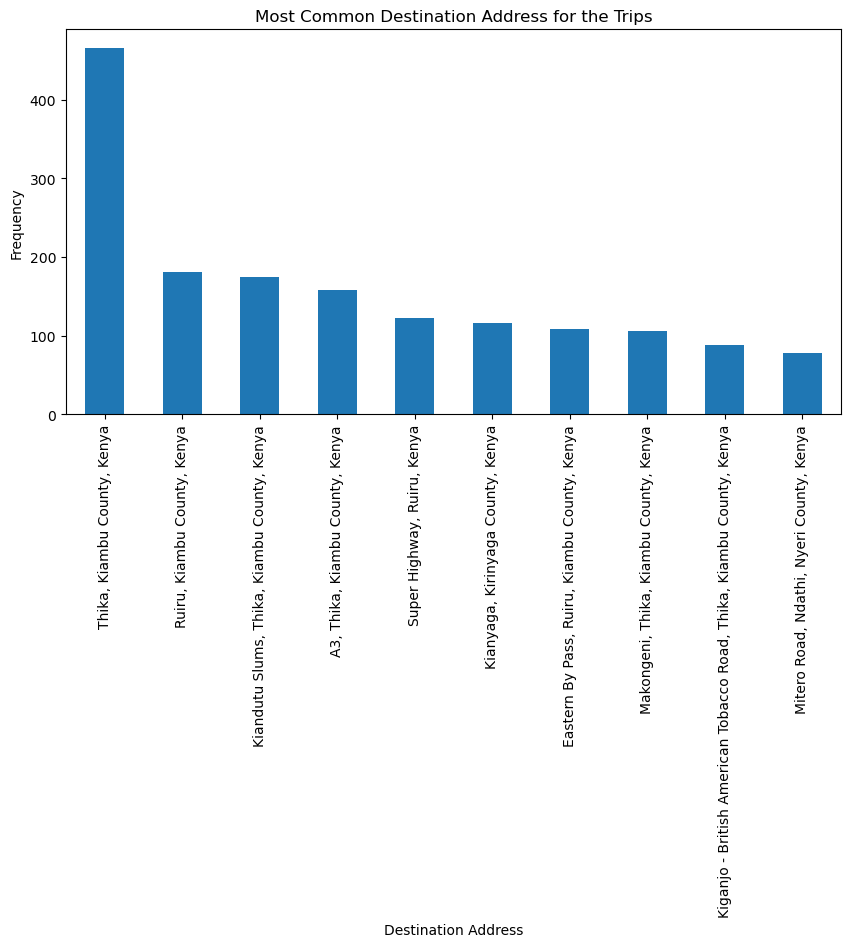

In [36]:
# Visualization to represent the most common destination address for the trips
plt.figure(figsize=(10, 5))
trips_made_df['destination_address'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Destination Address')
# plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.title('Most Common Destination Address for the Trips')
plt.show()

## 3. Any trends in driver behaviour for example speeding

In [37]:
trips_made_df['origin_time_stamp'] = pd.to_datetime(trips_made_df['origin_time_stamp'])
trips_made_df['destination_time_stamp'] = pd.to_datetime(trips_made_df['destination_time_stamp'])

In [38]:
# create a column named average_speed to represent the average speed of the vehicles during the trips
trips_made_df['duration_seconds'] = (trips_made_df['destination_time_stamp'] - trips_made_df['origin_time_stamp']).dt.total_seconds()
trips_made_df['average_speed'] = trips_made_df['distance'] /trips_made_df['duration_seconds']

In [39]:
trips_made_df.head()

,id,created,asset_id,distance,points,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,created_day,created_week,created_month,created_year,created_dayofweek,duration_seconds,average_speed
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",Monday,11,3,2022,Weekday,1340.0,3.225112
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",Tuesday,10,3,2023,Weekday,4796.0,5.150801
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",Tuesday,10,3,2023,Weekday,6256.0,4.905574
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",Tuesday,10,3,2023,Weekday,4647.0,5.295748
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",Tuesday,10,3,2023,Weekday,6256.0,4.538956


In [40]:
# convert the average speed from m/s to km/h
trips_made_df['average_speed'] = trips_made_df['average_speed'] * 3.6

## Util function to do average speed lineplots

In [41]:
def average_speed_lineplot(df_query, label, xlabel, ylabel, title):
    plt.figure(figsize=(10, 5))
    plt.plot(df_query, label=label)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## Lineplot to identify any trend in the average speed over the years

In [42]:
# Convert the created_year column to int type
trips_made_df['created_year'] = trips_made_df['created_year'].astype(int)

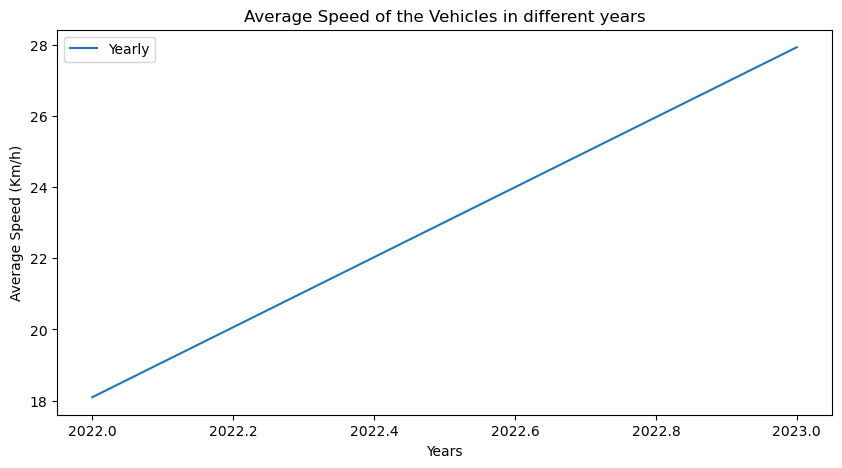

In [43]:
# Check for any trends in the average speed of the assets over the different years
average_speed_lineplot(trips_made_df.groupby('created_year')['average_speed'].mean(), 'Yearly', 'Years', 'Average Speed (Km/h)', 'Average Speed of the Vehicles in different years')

In [44]:
# save the trips_df to csv file
trips_made_df.to_csv('Data/trips_made_df_refined.csv', index=False)

### Creating asset category i.e small or medium to properly categorize the assets making the trips

In [45]:
assets['make_category'] = assets['make'].apply(lambda x: 'small' if x in ['SUZUKI EVERY', 'BAJAJ', 'PIAGGIO', 'tuk tuk', 'TUK TUK', 'Maruti'] else 'medium')

In [46]:
assets.isnull().sum()

id                0
make              0
model            13
year             15
make_category     0
dtype: int64

In [47]:
# merge the trips_df and assets_df to get the vehicle details for each trip in the trips_df dataframe
merged_df = pd.merge(trips_made_df, assets, left_on='asset_id', right_on='id', how='left')
merged_df

,id_x,created,asset_id,distance,points,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,...,created_month,created_year,created_dayofweek,duration_seconds,average_speed,id_y,make,model,year,make_category
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,...,3,2022,Weekday,1340.0,11.610403,0ROajub,HONDA,None,NaN,medium
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,...,3,2023,Weekday,4796.0,18.542882,0gMAW5w,TOYOTA,Hiace,2003.0,medium
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,...,3,2023,Weekday,6256.0,17.660066,0gMAW5w,TOYOTA,Hiace,2003.0,medium
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,...,3,2023,Weekday,4647.0,19.064692,0gMAW5w,TOYOTA,Hiace,2003.0,medium
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,...,3,2023,Weekday,6256.0,16.340242,0gMAW5w,TOYOTA,Hiace,2003.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,GeaklYd,2023-02-21 11:41:10.948000+00:00,3XBsRFw,13803.78,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.040364,37.069199,2023-02-21 11:41:06+00:00,"385 Mombasa Road, Thika, Kiambu County, Kenya",-1.040391,...,2,2023,Weekday,3545.0,14.017943,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small
4799,NSzqS6B,2023-02-21 10:17:02.952000+00:00,3XBsRFw,4968.03,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.040324,37.069244,2023-02-21 10:16:54+00:00,"385 OAU Road, Thika, Kiambu County, Kenya",-1.040152,...,2,2023,Weekday,1251.0,14.296489,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small
4800,jMW6L4T,2023-02-21 09:15:30.916000+00:00,3XBsRFw,10180.62,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.047289,37.073498,2023-02-21 09:15:27+00:00,"Garissa Road, Thika, Kiambu County, Kenya",-1.040326,...,2,2023,Weekday,3013.0,12.164033,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small
4801,pNnBGll,2023-02-21 08:41:38.993000+00:00,3XBsRFw,3134.15,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.042714,37.068249,2023-02-21 08:41:32+00:00,"30, Thika, Kenya",-1.047387,...,2,2023,Weekday,596.0,18.931107,3XBsRFw,BAJAJ,PR3 125 Enduro,2017.0,small


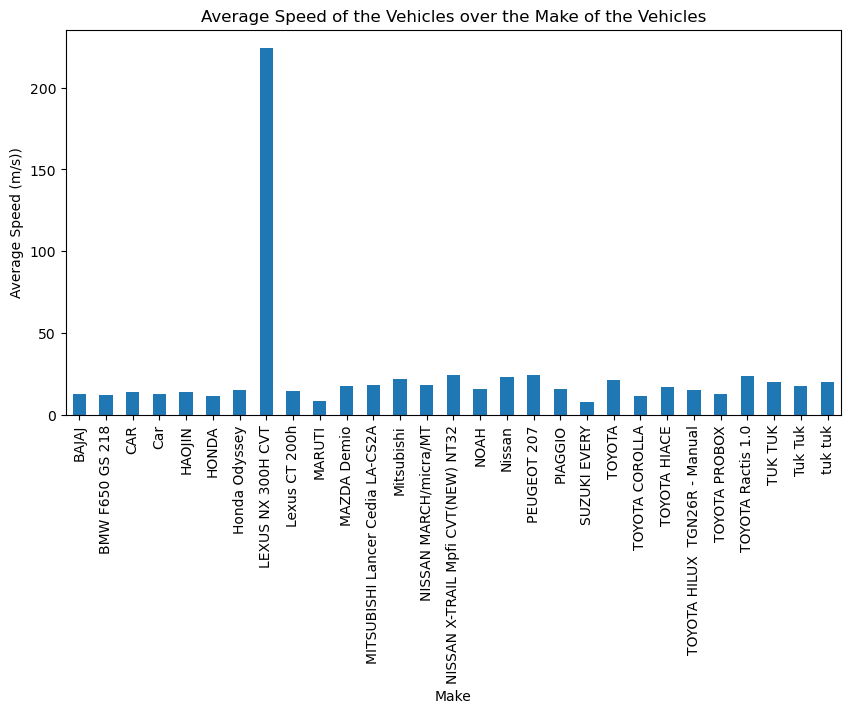

In [48]:
# plot the average speed of the vehicles over the make of the vehicles
plt.figure(figsize=(10, 5))
merged_df.groupby('make')['average_speed'].mean().plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Average Speed (m/s))')
plt.title('Average Speed of the Vehicles over the Make of the Vehicles')
plt.show()

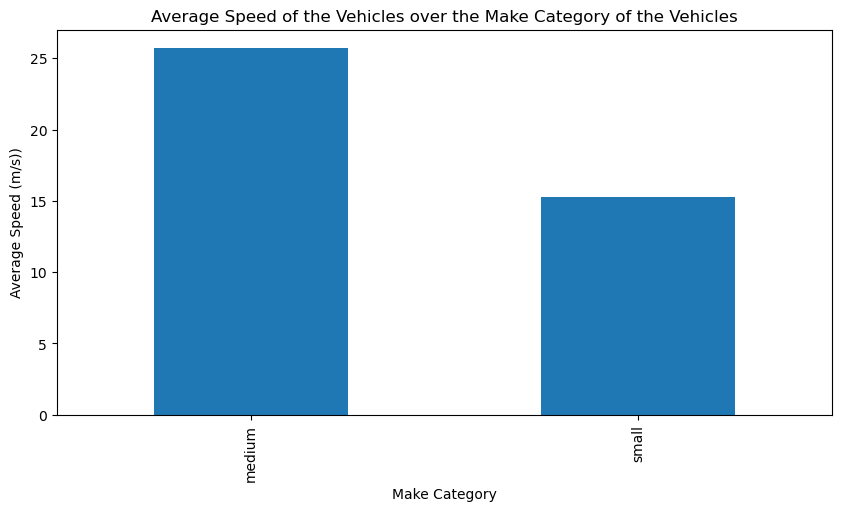

In [49]:
# visualize the average speed of the vehicles over the make category of the vehicles
plt.figure(figsize=(10, 5))
merged_df.groupby('make_category')['average_speed'].mean().plot(kind='bar')
plt.xlabel('Make Category')
plt.ylabel('Average Speed (m/s))')
plt.title('Average Speed of the Vehicles over the Make Category of the Vehicles')
plt.show()

In [50]:
# assets make making most of the trips
merged_df['make'].value_counts().head(10)

PIAGGIO                              450
TOYOTA                               450
CAR                                  300
MITSUBISHI Lancer Cedia LA-CS2A      150
NISSAN MARCH/micra/MT                150
MAZDA Demio                          150
NISSAN X-TRAIL Mpfi CVT(NEW) NT32    150
Mitsubishi                           150
Honda Odyssey                        150
Lexus CT 200h                        150
Name: make, dtype: int64

### Utility function to visualize average distance covered by different makes of assets

In [73]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [80]:
import seaborn as sns
def avg_distance_by_makes_lineplots(df_query, xlabel, ylabel, x, y, title):
    print(type(df_query))
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df_query, x=x, y=y, hue="make")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

<class 'pandas.core.frame.DataFrame'>


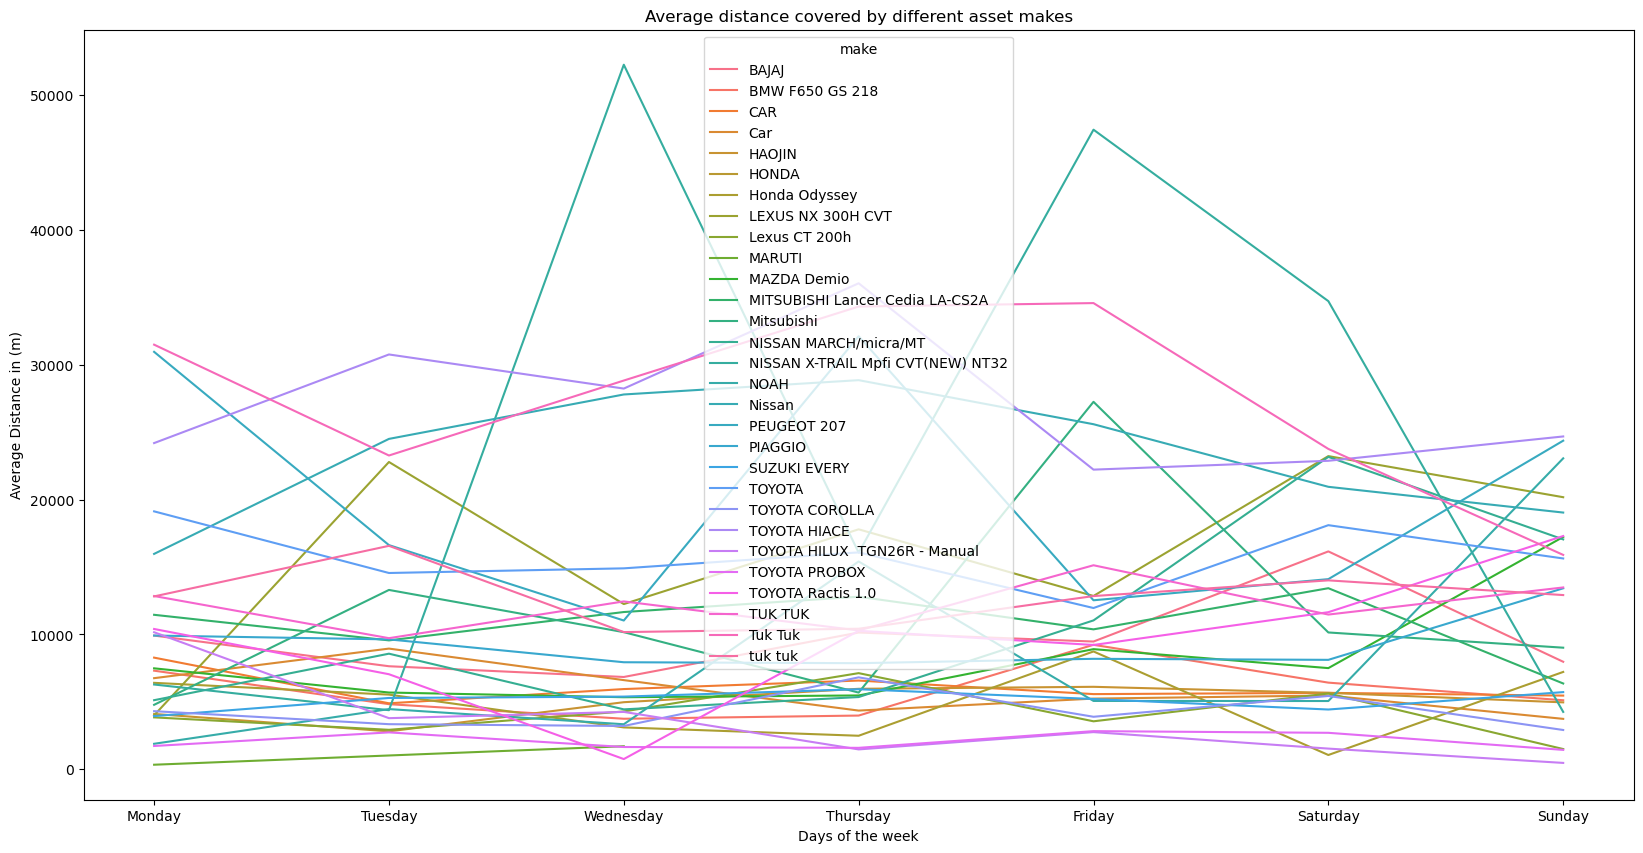

In [81]:
avg_distance_by_makes_lineplots(merged_df.groupby(["created_day", "make"])["distance"].mean().reset_index(), 'Days of the week', 'Average Distance in (m)', 'created_day', 'distance', 'Average distance covered by different asset makes')

<class 'pandas.core.frame.DataFrame'>


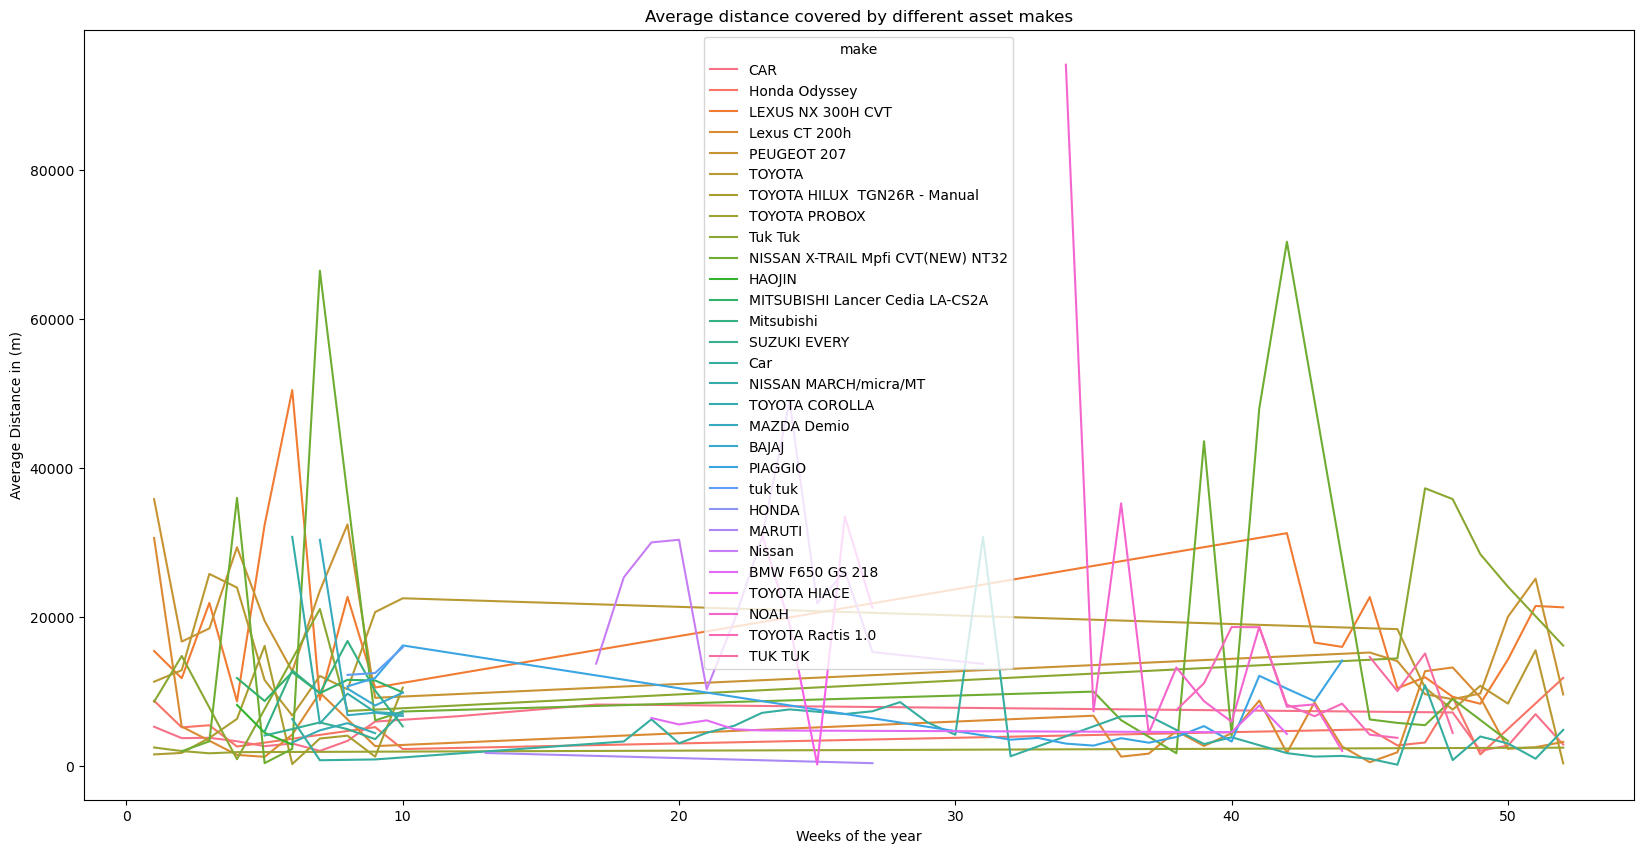

In [82]:
avg_distance_by_makes_lineplots(merged_df.groupby(["created_week", "make"])["distance"].mean().reset_index(), 'Weeks of the year', 'Average Distance in (m)', 'created_week', 'distance', 'Average distance covered by different asset makes')